In [15]:
import uproot
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [16]:
# particle_file = uproot.open('electron_onSource.S.BL-4LSTs25MSTs70SSTs-MSTF_ID0.eff-0.root')
# particle_file = uproot.open('proton_onSource.S.BL-4LSTs25MSTs70SSTs-MSTF_ID0.eff-0.root')
# particle_file = uproot.open('gamma_cone.S.BL-4LSTs25MSTs70SSTs-MSTF_ID0.eff-0.root')
particle_file = uproot.open('gamma_onSource.S.BL-4LSTs25MSTs70SSTs-MSTF_ID0.eff-0.root')
cuts = particle_file['DL2EventTree']
data = particle_file['data']

From eventDisplay/Converters repo, the description of the different classes is:

The Class parameter can be used to select different type of events:

    Events passing gamma/hadron separation cut and direction cut

DL2EventTree->Draw("MVA", "Class==5" );

    Events passing gamma/hadron separation cut and not direction cut

DL2EventTree->Draw("MVA", "Class==0" );

    Events before applying gamma/hadron separation cut and before applying direction cut

DL2EventTree->Draw("MVA", "Class==0||Class==7||Class==5", "");


In [17]:
cuts_arrays = cuts.arrays(expressions='CutClass', library='np')

# Events surviving gamma/hadron separation and direction cuts:
mask_gamma_like_and_direction = cuts_arrays['CutClass'] == 5

# Events surviving gamma/hadron separation cut and not direction cut
mask_gamma_like_no_direction = cuts_arrays['CutClass'] == 0

# Events not surviving gamma/hadron separation cut and not direction cut
mask_non_gamma_like_and_direction = cuts_arrays['CutClass'] == 7

# Events before gamma/hadron and direction cuts (classes 0, 5 and 7)
gamma_like_events_all = mask_gamma_like_no_direction | mask_gamma_like_and_direction
gamma_like_events_all = gamma_like_events_all | (cuts_arrays['CutClass'] == 7)

In [22]:
Xoff = data.arrays(expressions='Xoff_derot', library='np')['Xoff_derot']
Yoff = data.arrays(expressions='Yoff_derot', library='np')['Yoff_derot']
MCXoff = data.arrays(expressions='MCxoff', library='np')['MCxoff']
MCYoff = data.arrays(expressions='MCyoff', library='np')['MCyoff']

NImages = data.arrays(expressions='NImages', library='np')['NImages']

ze = data.arrays(expressions='Ze', library='np')['Ze']
az = data.arrays(expressions='Az', library='np')['Az']
MCze = data.arrays(expressions='MCze', library='np')['MCze']
MCaz = data.arrays(expressions='MCaz', library='np')['MCaz']

print("Event statistics:")
for cut_class in np.unique(cuts_arrays['CutClass']):
    print(" - cut class {}: {}".format(cut_class, len(Xoff[cuts_arrays['CutClass'] == cut_class])))
    
number_of_rows = Xoff[gamma_like_events_all].shape[0]
random_indices = np.random.choice(number_of_rows, size=20000, replace=False)

Xoff = Xoff[random_indices]
Yoff = Yoff[random_indices]
MCXoff = MCXoff[random_indices]
MCYoff = MCYoff[random_indices]
NImages = NImages[random_indices]

# mask = mask_gamma_like_and_direction
# Xoff = Xoff[mask]
# Yoff = Yoff[mask]
# MCXoff = MCXoff[mask]
# MCYoff = MCYoff[mask]

Event statistics:
 - cut class 0: 2067935
 - cut class 3: 1381769
 - cut class 4: 1183272
 - cut class 5: 6261732
 - cut class 6: 456009
 - cut class 7: 16058572


In [23]:
ang_diff = np.sqrt((Xoff-MCXoff)**2 + (Yoff-MCYoff)**2)

(0.001, 10)

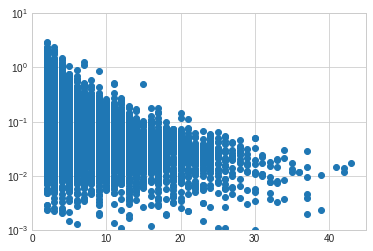

In [28]:
mask = ang_diff < 20000
plt.scatter(NImages[mask], ang_diff[mask])
plt.yscale('log')
plt.ylim([0.001, 10])

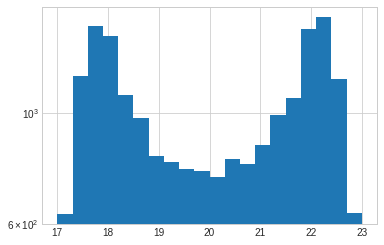

In [29]:
mask = mask_non_gamma_like_and_direction
number_of_rows = Xoff[mask].shape[0]
random_indices = np.random.choice(number_of_rows, size=20000, replace=False)

# plt.hist(np.sqrt((ze[mask][random_indices]-MCze[mask][random_indices])**2 + (az[mask][random_indices]-MCaz[mask][random_indices])**2), bins=20)
plt.hist(MCze[mask][random_indices], bins=20)
plt.yscale('log')


In [ ]:
mask = mask_non_gamma_like_and_direction
number_of_rows = Xoff[mask].shape[0]
random_indices = np.random.choice(number_of_rows, size=20000, replace=False)

plt.hist(np.sqrt((Xoff[mask][random_indices]-MCXoff[mask][random_indices])**2 + (Yoff[mask][random_indices]-MCYoff[mask][random_indices])**2), bins=20)
plt.yscale('log')


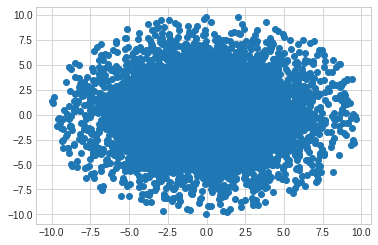

In [133]:
number_of_rows = MCXoff.shape[0]
random_indices = np.random.choice(number_of_rows, size=20000, replace=False)

plt.scatter(MCXoff[random_indices], MCYoff[random_indices], marker='o');

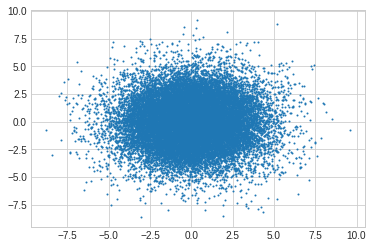

In [6]:
mask = gamma_like_events_all
number_of_rows = Xoff[mask].shape[0]
random_indices = np.random.choice(number_of_rows, size=20000, replace=False)

plt.scatter(Xoff[mask][random_indices], Yoff[mask][random_indices], marker='o', s=1);
# plt.xlim([-0.5, 0.5])
# plt.ylim([-0.5, 0.5])

Cut class: 0


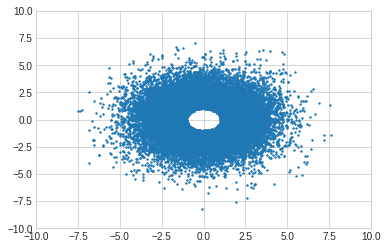

Cut class: 3


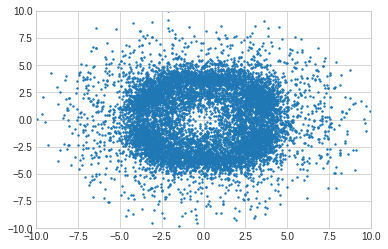

Cut class: 4


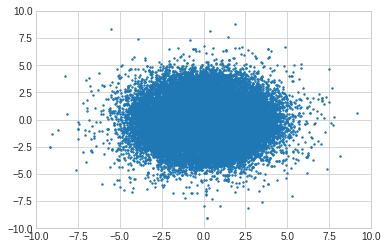

Cut class: 5


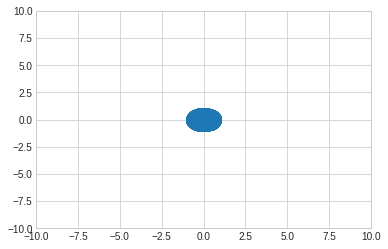

Cut class: 6


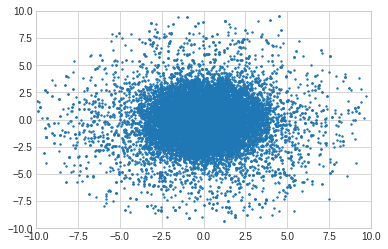

Cut class: 7


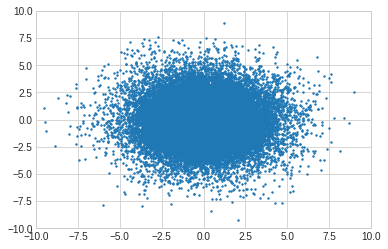

In [19]:
for cut_class in np.unique(cuts_arrays['CutClass']):
    print("Cut class: {}".format(cut_class))
    mask = cuts_arrays['CutClass'] == cut_class
    number_of_rows = Xoff[mask].shape[0]
    random_indices = np.random.choice(number_of_rows, size=20000, replace=True)

    plt.scatter(Xoff[mask][random_indices], Yoff[mask][random_indices], marker='o', s=2)
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
#     plt.xlim([-2, 2])
#     plt.ylim([-2, 2])
    plt.show()

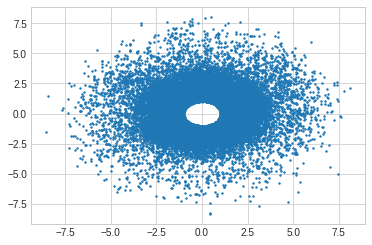

In [140]:
mask = mask_gamma_like_no_direction
number_of_rows = Xoff[mask].shape[0]
random_indices = np.random.choice(number_of_rows, size=20000, replace=False)

plt.scatter(Xoff[mask][random_indices], Yoff[mask][random_indices], marker='o', s=2);
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])

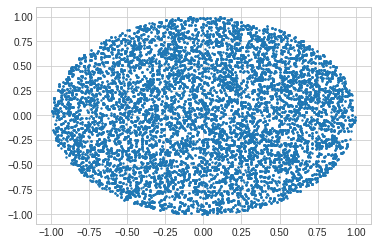

In [141]:
number_of_rows = Xoff[mask_gamma_like_and_direction].shape[0]
random_indices = np.random.choice(number_of_rows, size=20000, replace=True)

plt.scatter(Xoff[mask_gamma_like_and_direction][random_indices], Yoff[mask_gamma_like_and_direction][random_indices], marker='o', s=2);
# plt.xlim([-0.5, 0.5])
# plt.ylim([-0.5, 0.5])

For protons:
* mask_gamma_like_and_direction: CLEAR cut of 1 deg in reconstructed direction
* mask_gamma_like_no_direction: CLEAR cut excluding events within 1 deg

In [64]:
theta2 = Xoff*Xoff + Yoff*Yoff
np.max(theta2)

0.999981498468179

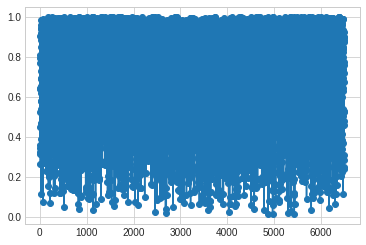

In [63]:
plt.plot(np.sqrt(Xoff*Xoff + Yoff*Yoff), marker='o');

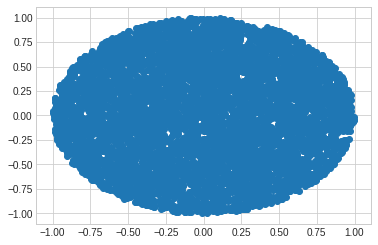

In [61]:
plt.scatter(Xoff, Yoff, marker='o');

In [7]:
number_of_rows = Xoff.shape[0]
random_indices = np.random.choice(number_of_rows, size=20000, replace=False)

['runNumber',
 'eventNumber',
 'MJD',
 'Time',
 'TelElevation',
 'TelAzimuth',
 'ArrayPointing_Elevation',
 'ArrayPointing_Azimuth',
 'WobbleN',
 'WobbleE',
 'LTrig',
 'NTrig',
 'NImages',
 'ImgSel',
 'MCprimary',
 'MCe0',
 'MCxcore',
 'MCycore',
 'MCaz',
 'MCze',
 'MCxoff',
 'MCyoff',
 'MCCorsikaRunID',
 'MCCorsikaShowerID',
 'MCFirstInteractionHeight',
 'MCFirstInteractionDepth',
 'MCR',
 'ImgSel_list',
 'NTtype',
 'TtypeID',
 'NImages_Ttype',
 'img2_ang',
 'RecID',
 'Ze',
 'Az',
 'Xoff',
 'Yoff',
 'Xoff_derot',
 'Yoff_derot',
 'stdS',
 'Xcore',
 'Ycore',
 'stdP',
 'Chi2',
 'meanPedvar_Image',
 'ntubes',
 'dist',
 'fui',
 'size',
 'loss',
 'width',
 'length',
 'tgrad_x',
 'asym',
 'Fitstat',
 'DispNImages',
 'DispXoff_T',
 'DispYoff_T',
 'DispWoff_T',
 'DispDiff',
 'Xoff_intersect',
 'Yoff_intersect',
 'cross',
 'crossO',
 'R',
 'NMSCW',
 'ES',
 'MSCW',
 'MSCL',
 'MWR',
 'MLR',
 'ErecS',
 'EChi2S',
 'dES',
 'dESabs',
 'NErecST',
 'ErecQL',
 'EmissionHeight',
 'EmissionHeightChi2',
 '